## Let's do some exploratory data analysis (EDA) for understanding the dataset and gaining insights before building machine learning model

### Import Necessary Libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import xlrd

from sklearn.model_selection import train_test_split 
import xgboost as xgb 
from sklearn.metrics import accuracy_score
from utils import *


In [16]:
data = pd.read_csv('Titanic_dataset.csv')



In [17]:
columns_to_drop = ['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest']
data = data.drop(columns_to_drop, axis=1)

data['age'].fillna(data['age'].median(), inplace=True)
data['fare'].fillna(data['fare'].mean(), inplace=True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

data = pd.get_dummies(data, columns=['sex', 'embarked'])

In [18]:
summary_stats = data.describe()
print(summary_stats)

            pclass     survived          age        sibsp        parch   
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000  \
mean      2.294882     0.381971    29.503183     0.498854     0.385027   
std       0.837836     0.486055    12.905246     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    22.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    35.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare  
count  1309.000000  
mean     33.295479  
std      51.738879  
min       0.000000  
25%       7.895800  
50%      14.454200  
75%      31.275000  
max     512.329200  


#### Histogram of the passengers' age

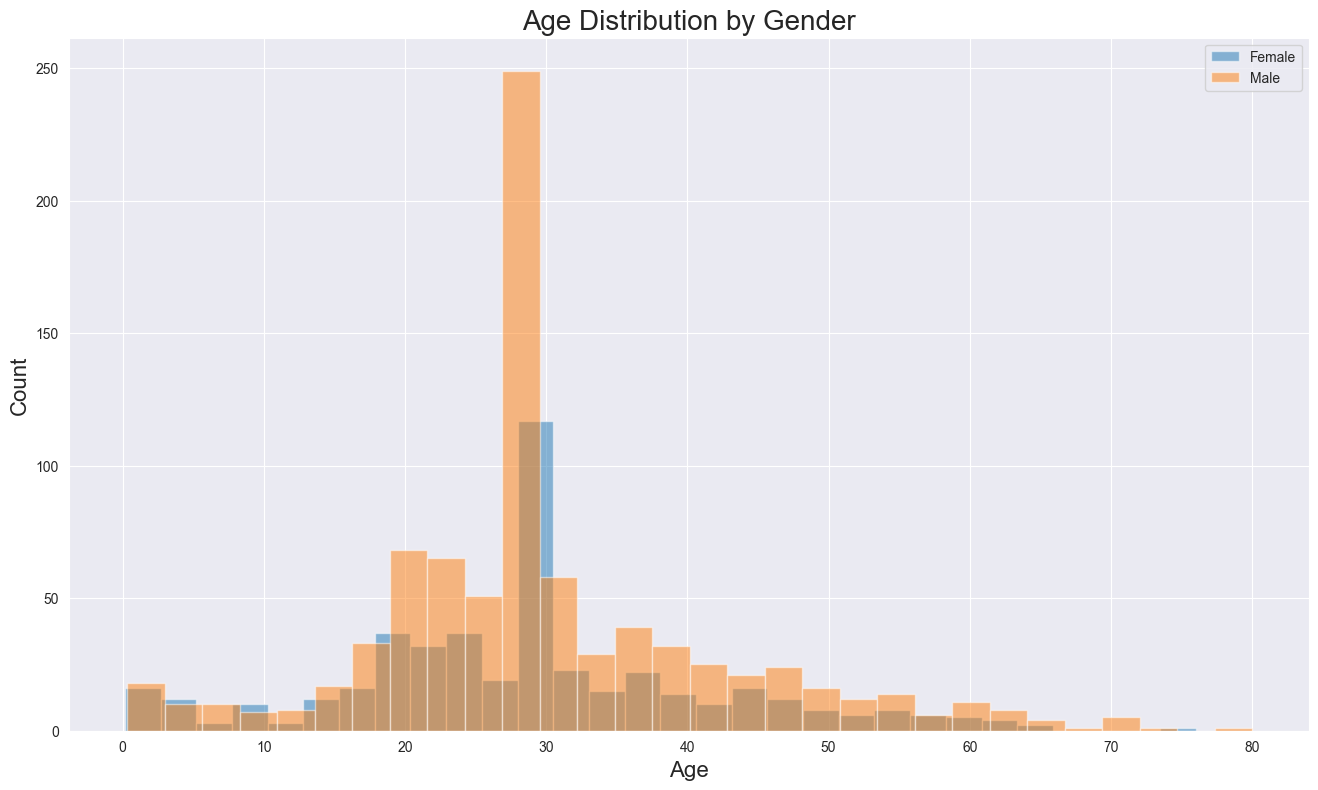

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 9))
plt.hist(data[data['sex_female'] == True]['age'], bins=30, alpha=0.5, label='Female')
plt.hist(data[data['sex_male'] == True]['age'], bins=30, alpha=0.5, label='Male')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Age Distribution by Gender', fontsize=20)
plt.legend()
plt.show()

#### Fare Distribution by Passenger Class

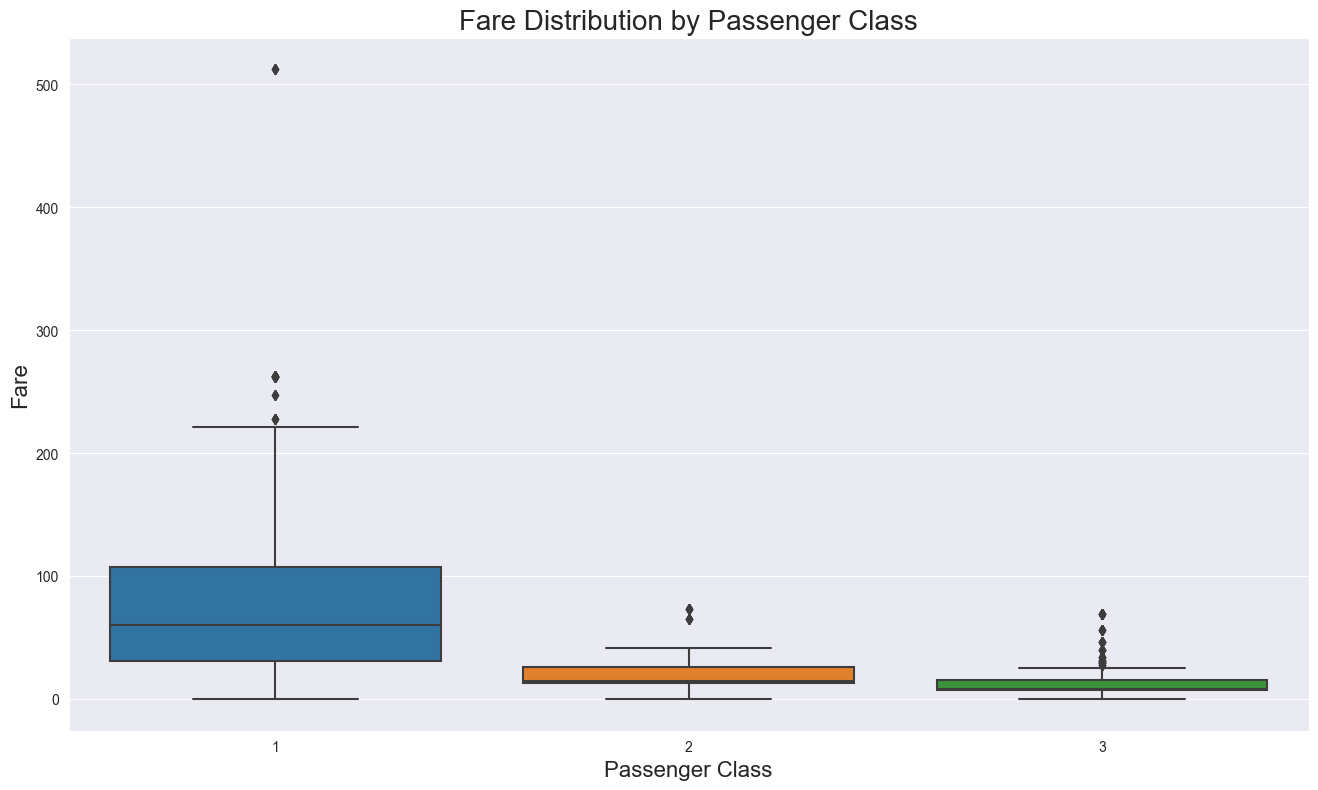

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 9))
sns.boxplot(x='pclass', y='fare', data=data)
plt.xlabel('Passenger Class', fontsize = 16)
plt.ylabel('Fare', fontsize = 16)
plt.title('Fare Distribution by Passenger Class', fontsize = 20)
plt.show()

#### Relationship between having parents/children abroad and Survival

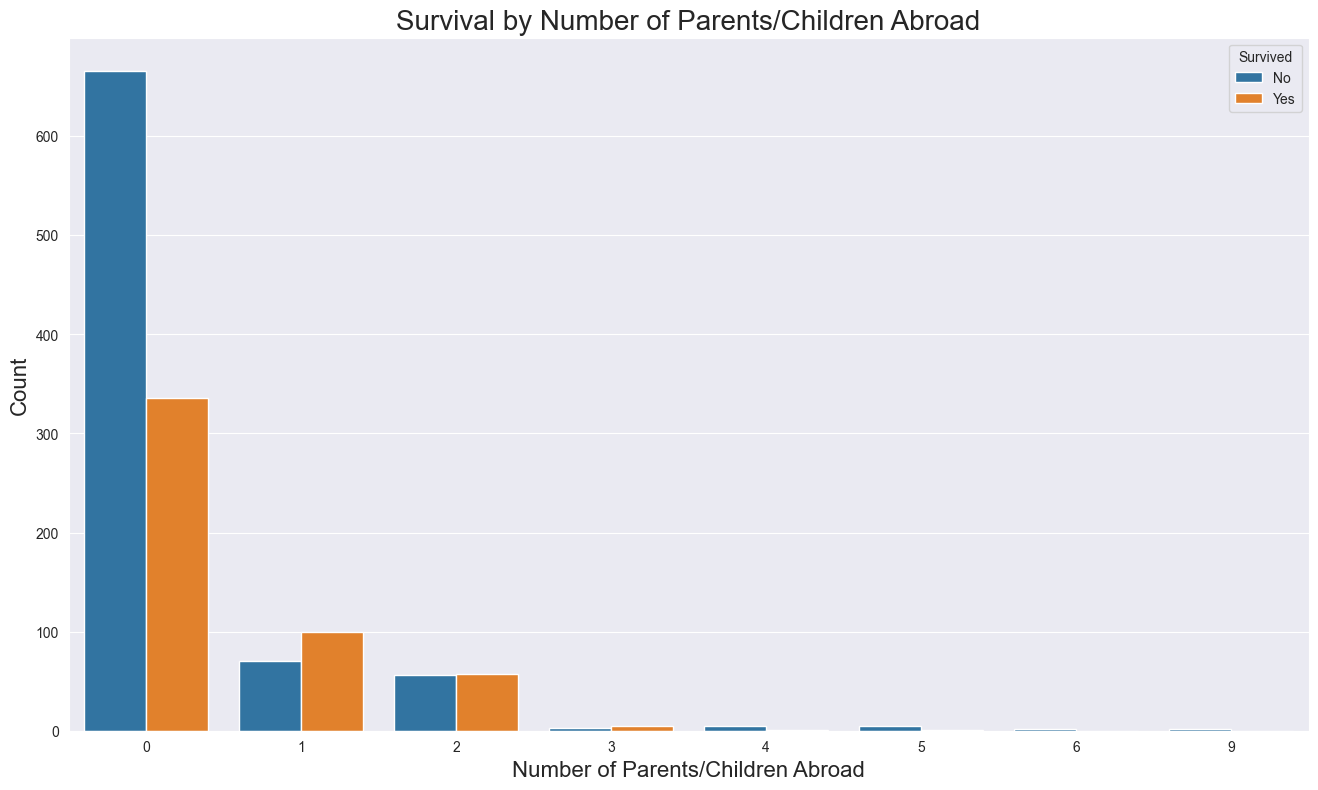

In [22]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 9))
sns.countplot(x='parch', hue='survived', data=data)
plt.xlabel('Number of Parents/Children Abroad',fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Survival by Number of Parents/Children Abroad', fontsize = 20)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

#### Relationship between having siblings/spouses abroad and Survival

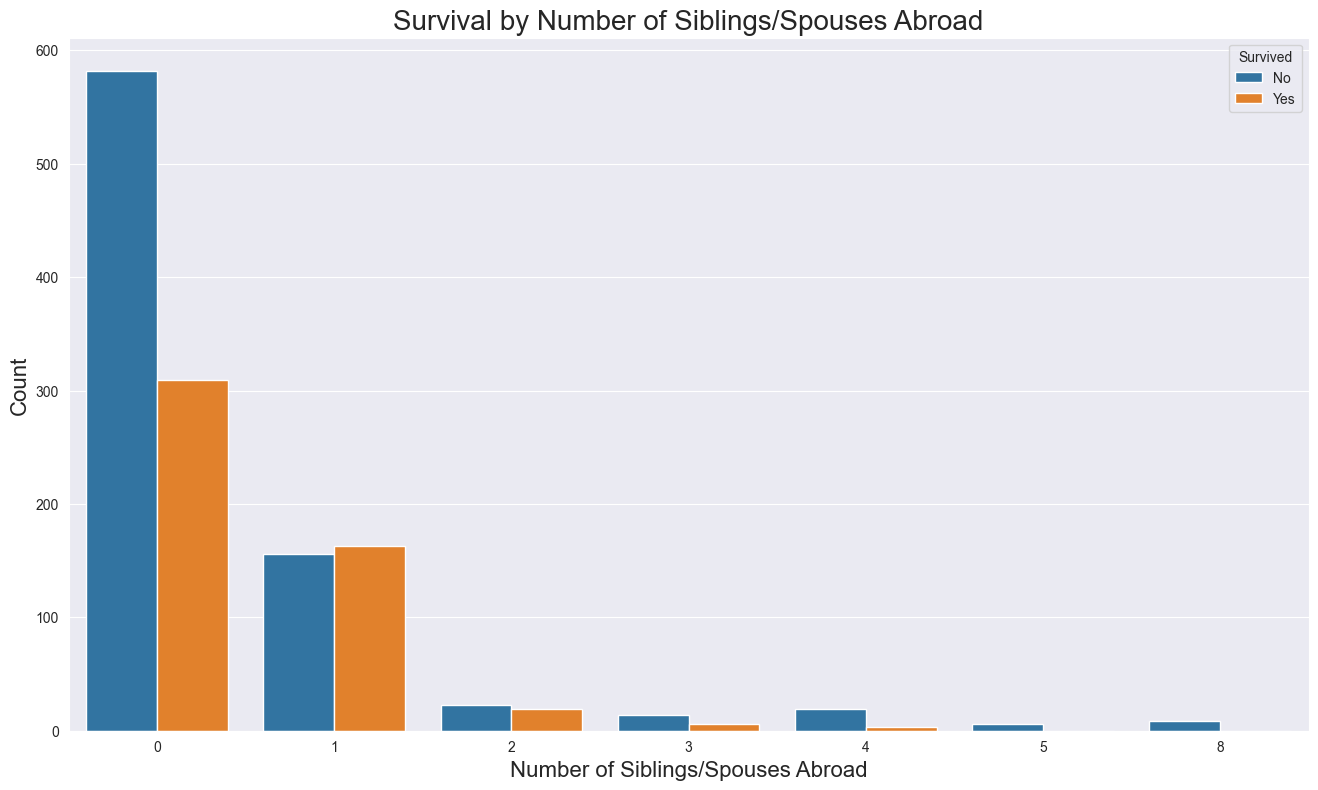

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 9))
sns.countplot(x='sibsp', hue='survived', data=data)
plt.xlabel('Number of Siblings/Spouses Abroad',fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Survival by Number of Siblings/Spouses Abroad', fontsize = 20)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

#### Survival rate by passenger class

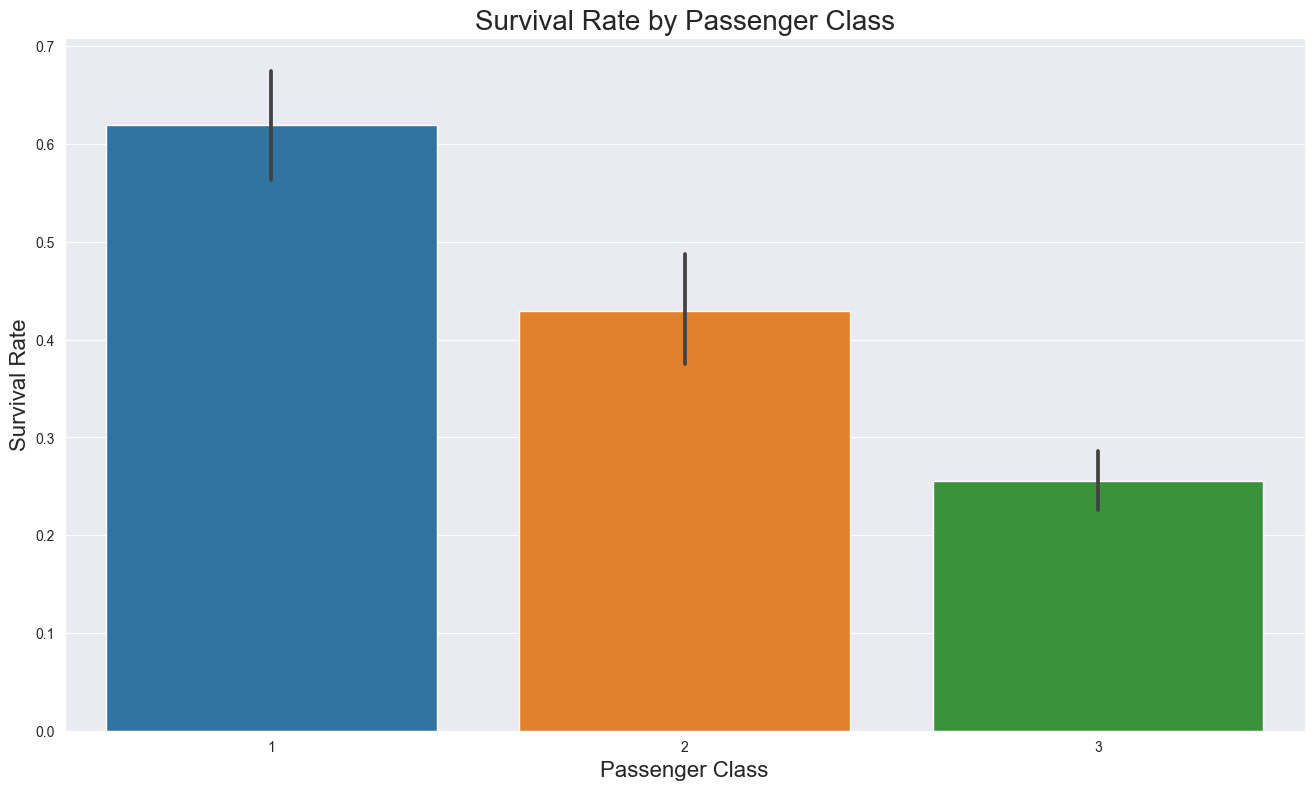

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 9))
sns.barplot(x='pclass', y='survived', data=data)
plt.xlabel('Passenger Class', fontsize = 16)
plt.ylabel('Survival Rate', fontsize = 16)
plt.title('Survival Rate by Passenger Class', fontsize = 20)
plt.show()

#### Survival by gender

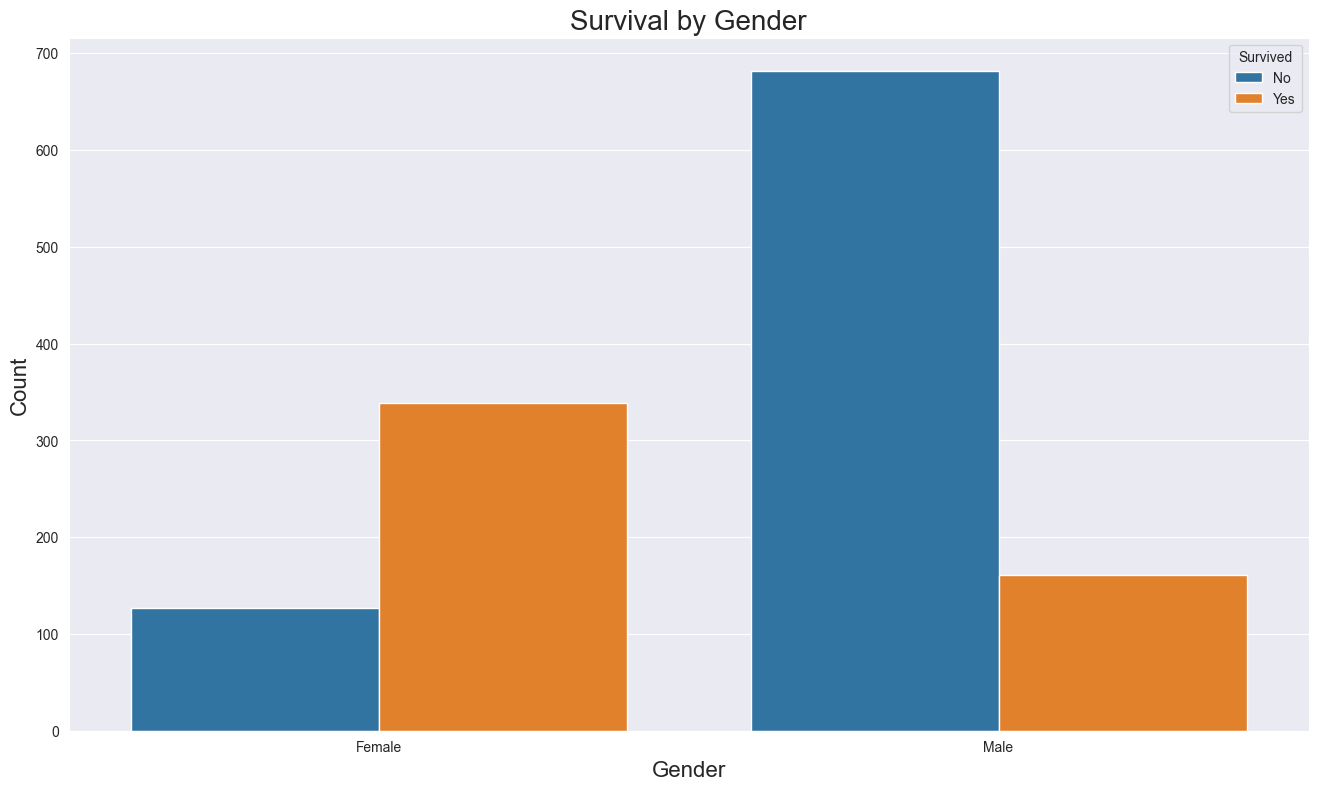

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(16, 9))
sns.countplot(x='sex_male', hue='survived', data=data)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Survival by Gender', fontsize=20)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

#### Correlation matrix heatmap

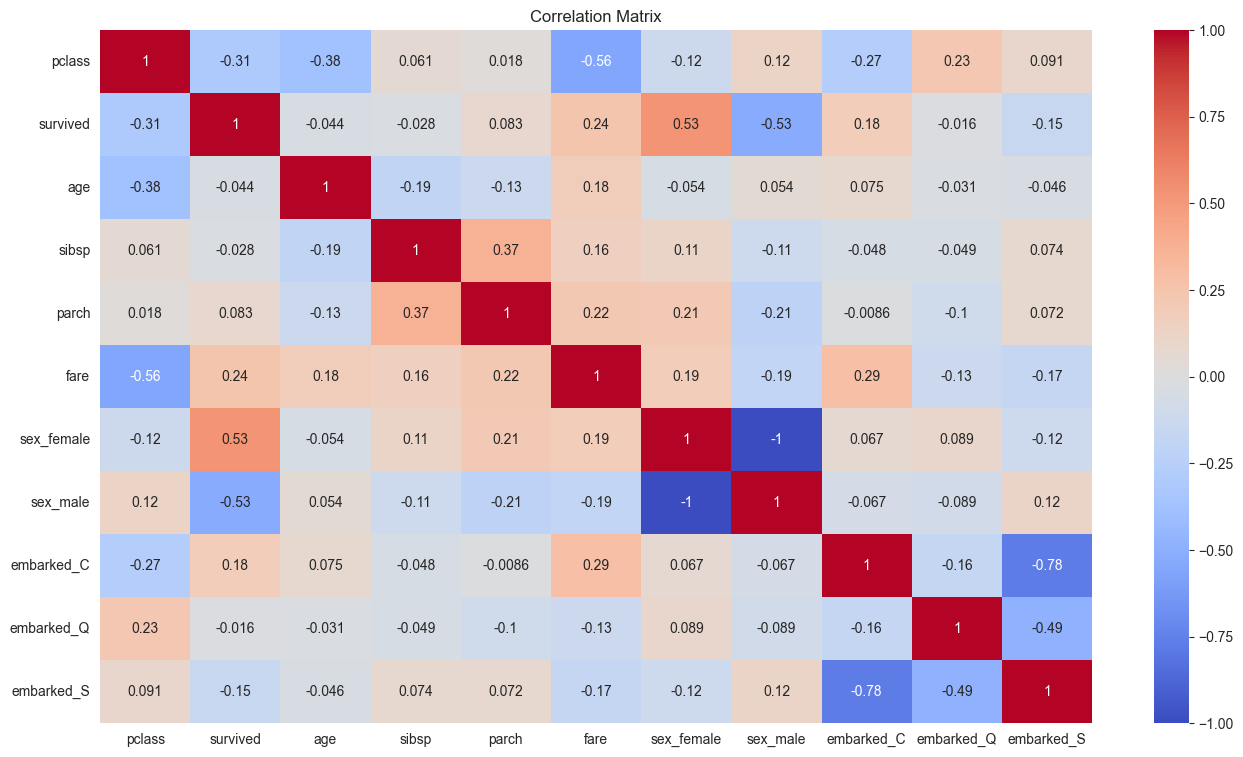

In [26]:
corr_matrix = data.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()